In [62]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Load your dataset
data = pd.read_csv('data.csv')

In [64]:
# Select relevant features for the analysis
features = ['Perseverance', 'DesireToTakeInitiative', 'Competitiveness', 
            'SelfReliance', 'StrongNeedToAchieve', 'SelfConfidence', 
            'GoodPhysicalHealth']

In [65]:
# Prepare the feature matrix (X) and the target variable (y)
X = data[features]
y = data['y']

In [66]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [91]:
# Predict on the test set
y_pred = rf.predict(X_test)

In [93]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy: 0.48

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.59      0.59        41
           1       0.32      0.32      0.32        25

    accuracy                           0.48        66
   macro avg       0.45      0.45      0.45        66
weighted avg       0.48      0.48      0.48        66



In [70]:
# Feature Importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

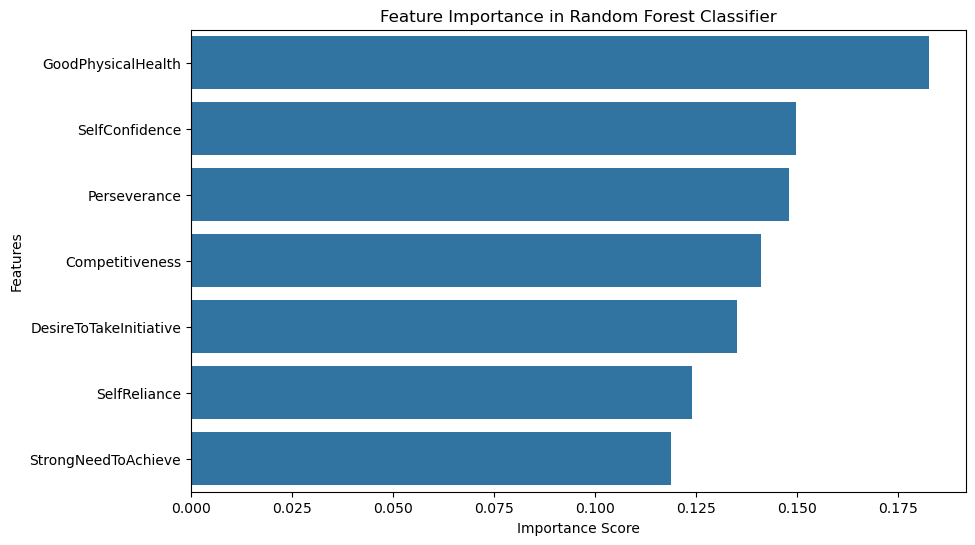

In [71]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=[features[i] for i in indices])
plt.title("Feature Importance in Random Forest Classifier")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [72]:
def get_valid_input(trait_name):
    while True:
        try:
            value = int(input(f"Enter your {trait_name} level (1-5): "))
            if value < 1 or value > 5:
                print("Invalid input! Please enter a whole number between 1 and 5.")
            else:
                return value
        except ValueError:
            print("Invalid input! Please enter a whole number between 1 and 5.")

def predict_success_interactive():
    # Prompt user for input for each trait with validation
    perseverance = get_valid_input("Perseverance")
    desire_to_take_initiative = get_valid_input("Desire to Take Initiative")
    competitiveness = get_valid_input("Competitiveness")
    self_reliance = get_valid_input("Self-Reliance")
    strong_need_to_achieve = get_valid_input("Strong Need to Achieve")
    self_confidence = get_valid_input("Self-Confidence")
    good_physical_health = get_valid_input("Good Physical Health")

    # Create a DataFrame for the input features
    input_data = pd.DataFrame({
        'Perseverance': [perseverance],
        'DesireToTakeInitiative': [desire_to_take_initiative],
        'Competitiveness': [competitiveness],
        'SelfReliance': [self_reliance],
        'StrongNeedToAchieve': [strong_need_to_achieve],
        'SelfConfidence': [self_confidence],
        'GoodPhysicalHealth': [good_physical_health]
    })

    # Standardize the input features using the same scaler used during training
    #input_scaled = scaler.transform(input_data)

    # Predict the outcome using the trained Random Forest model
    prediction = rf.predict(input_data)

    # Interpret the prediction
    if prediction[0] == 1:
        print("The model predicts: Success!")
    else:
        print("The model predicts: Failure.")

In [87]:
# Call the function
predict_success_interactive()

Enter your Perseverance level (1-5):  5
Enter your Desire to Take Initiative level (1-5):  5
Enter your Competitiveness level (1-5):  5
Enter your Self-Reliance level (1-5):  5
Enter your Strong Need to Achieve level (1-5):  5
Enter your Self-Confidence level (1-5):  5
Enter your Good Physical Health level (1-5):  5


The model predicts: Success!


In [95]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


SVM Accuracy: 0.58

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.78      0.70        41
           1       0.40      0.24      0.30        25

    accuracy                           0.58        66
   macro avg       0.51      0.51      0.50        66
weighted avg       0.54      0.58      0.55        66



In [97]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

ModuleNotFoundError: No module named 'xgboost'